In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st
import seaborn as sns

In [17]:
df = pd.read_csv('Dataset/train.csv')

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
0,1.0,a,-1d,0.828866,216.0,4.846091,K,50.0,0,161.714226,...,n,2.0,414.0,0.0,S,2.191401,a8,NaN,15.921017,1
1,8.0,a,-1d,8.981168,46.0,7.324911,A,270.0,0,328.559851,...,n,3.0,63.0,0.0,M,3.811778,a8,NaN,47.567140,0
2,1.0,a,-1d,1.458061,3304.0,7.548887,D,200.0,1,298.775554,...,n,1.0,218.0,0.0,M,4.284457,a4,NaN,10.522228,0
3,1.0,b,-1d,2.753682,212.0,8.200746,E,170.0,0,285.342907,...,y,2.0,NaN,0.0,D,4.680751,a7,NaN,21.185050,0
4,1.0,unknown,-1d,4.496872,1050.0,5.071094,B,260.0,1,328.464688,...,n,3.0,293.0,0.0,S,2.740114,a5,NaN,47.491164,0


In [19]:
df[df.columns[df.dtypes != 'float64']].head(20)

,1,2,6,8,12,16,18,19,label
0,a,-1d,K,0,n,S,a8,NaN,1
1,a,-1d,A,0,n,M,a8,NaN,0
2,a,-1d,D,1,n,M,a4,NaN,0
3,b,-1d,E,0,y,D,a7,NaN,0
4,unknown,-1d,B,1,n,S,a5,NaN,0
5,unknown,-1d,A,0,n,S,a5,NaN,0
6,a,349d,D,1,n,S,a5,A,0
7,a,-1d,A,1,n,M,a11,NaN,0
8,unknown,-1d,D,0,n,M,a6,NaN,0
9,a,-1d,F,0,n,D,a3,NaN,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21931 entries, 0 to 21930
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21858 non-null  float64
 1   1       21842 non-null  object 
 2   2       21875 non-null  object 
 3   3       21826 non-null  float64
 4   4       21906 non-null  float64
 5   5       21871 non-null  float64
 6   6       21786 non-null  object 
 7   7       21911 non-null  float64
 8   8       21931 non-null  int64  
 9   9       21892 non-null  float64
 10  10      21828 non-null  float64
 11  11      21860 non-null  float64
 12  12      21918 non-null  object 
 13  13      21891 non-null  float64
 14  14      17946 non-null  float64
 15  15      21832 non-null  float64
 16  16      21921 non-null  object 
 17  17      21830 non-null  float64
 18  18      21847 non-null  object 
 19  19      4250 non-null   object 
 20  20      21930 non-null  float64
 21  label   21931 non-null  int64  
dty

In [21]:
stats = df.describe().T.reset_index()
stats

,index,count,mean,std,min,25%,50%,75%,max
0,0,21858.0,2.709443,2.976380,1.000000,1.000000,2.000000,3.000000,51.000000
1,3,21826.0,4.204116,3.752786,-11.138786,1.605409,4.190917,6.811247,17.647593
2,4,21906.0,1383.256596,3030.087625,-8019.000000,80.000000,470.000000,1472.750000,102127.000000
3,5,21871.0,6.589936,0.921664,3.776680,5.901285,6.517118,7.246177,10.303540
4,7,21911.0,157.450596,83.121658,10.000000,80.000000,160.000000,210.000000,310.000000
5,8,21931.0,0.542429,0.498208,0.000000,0.000000,1.000000,1.000000,1.000000
6,9,21892.0,256.617674,71.635412,-1.892158,209.751981,277.786998,306.584649,347.191571
7,10,21828.0,0.608164,1.893069,0.000000,0.000000,0.000000,0.000000,41.000000
8,11,21860.0,268.845882,183.952200,0.003898,119.317515,242.093814,388.855035,1081.031042
9,13,21891.0,2.063816,0.784205,0.000000,2.000000,2.000000,3.000000,3.000000


#### Notice that most of the values in column 19 are None values, Thus we will remove this column:

In [22]:
df.drop(columns=['19'], inplace=True)

#### We would like to check whether there are rows with a lot of missing values that we can ommit. 

In [23]:
(df.apply(lambda x: x.isnull().sum(), axis=1) > 2).sum()

5

In [24]:
(df.apply(lambda x: x.isnull().sum(), axis=1) > 3).sum()

0

#### As we can see there are no samples in which there are more than 3 columns with NaN value

In [25]:
## find numeric columns
df_numeric_col = df[df.columns[df.dtypes == 'float64']]
df_numeric_col

,0,3,4,5,7,9,10,11,13,14,15,17,20
0,1.0,0.828866,216.0,4.846091,50.0,161.714226,0.0,85.964376,2.0,414.0,0.0,2.191401,15.921017
1,8.0,8.981168,46.0,7.324911,270.0,328.559851,0.0,294.552881,3.0,63.0,0.0,3.811778,47.567140
2,1.0,1.458061,3304.0,7.548887,200.0,298.775554,0.0,317.615920,1.0,218.0,0.0,4.284457,10.522228
3,1.0,2.753682,212.0,8.200746,170.0,285.342907,0.0,181.773337,2.0,NaN,0.0,4.680751,21.185050
4,1.0,4.496872,1050.0,5.071094,260.0,328.464688,0.0,454.058222,3.0,293.0,0.0,2.740114,47.491164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21926,1.0,9.234068,228.0,6.497949,200.0,298.387445,0.0,199.845633,2.0,257.0,0.0,3.036520,23.647446
21927,3.0,1.425130,829.0,4.459834,270.0,330.998210,2.0,654.216171,0.0,196.0,0.0,2.108740,17.079316
21928,1.0,7.656161,296.0,6.688392,80.0,210.458322,0.0,97.943586,3.0,NaN,0.0,4.083415,26.412485
21929,2.0,4.016924,57.0,5.486059,90.0,220.485053,0.0,407.562382,2.0,404.0,0.0,2.587831,-2.056748


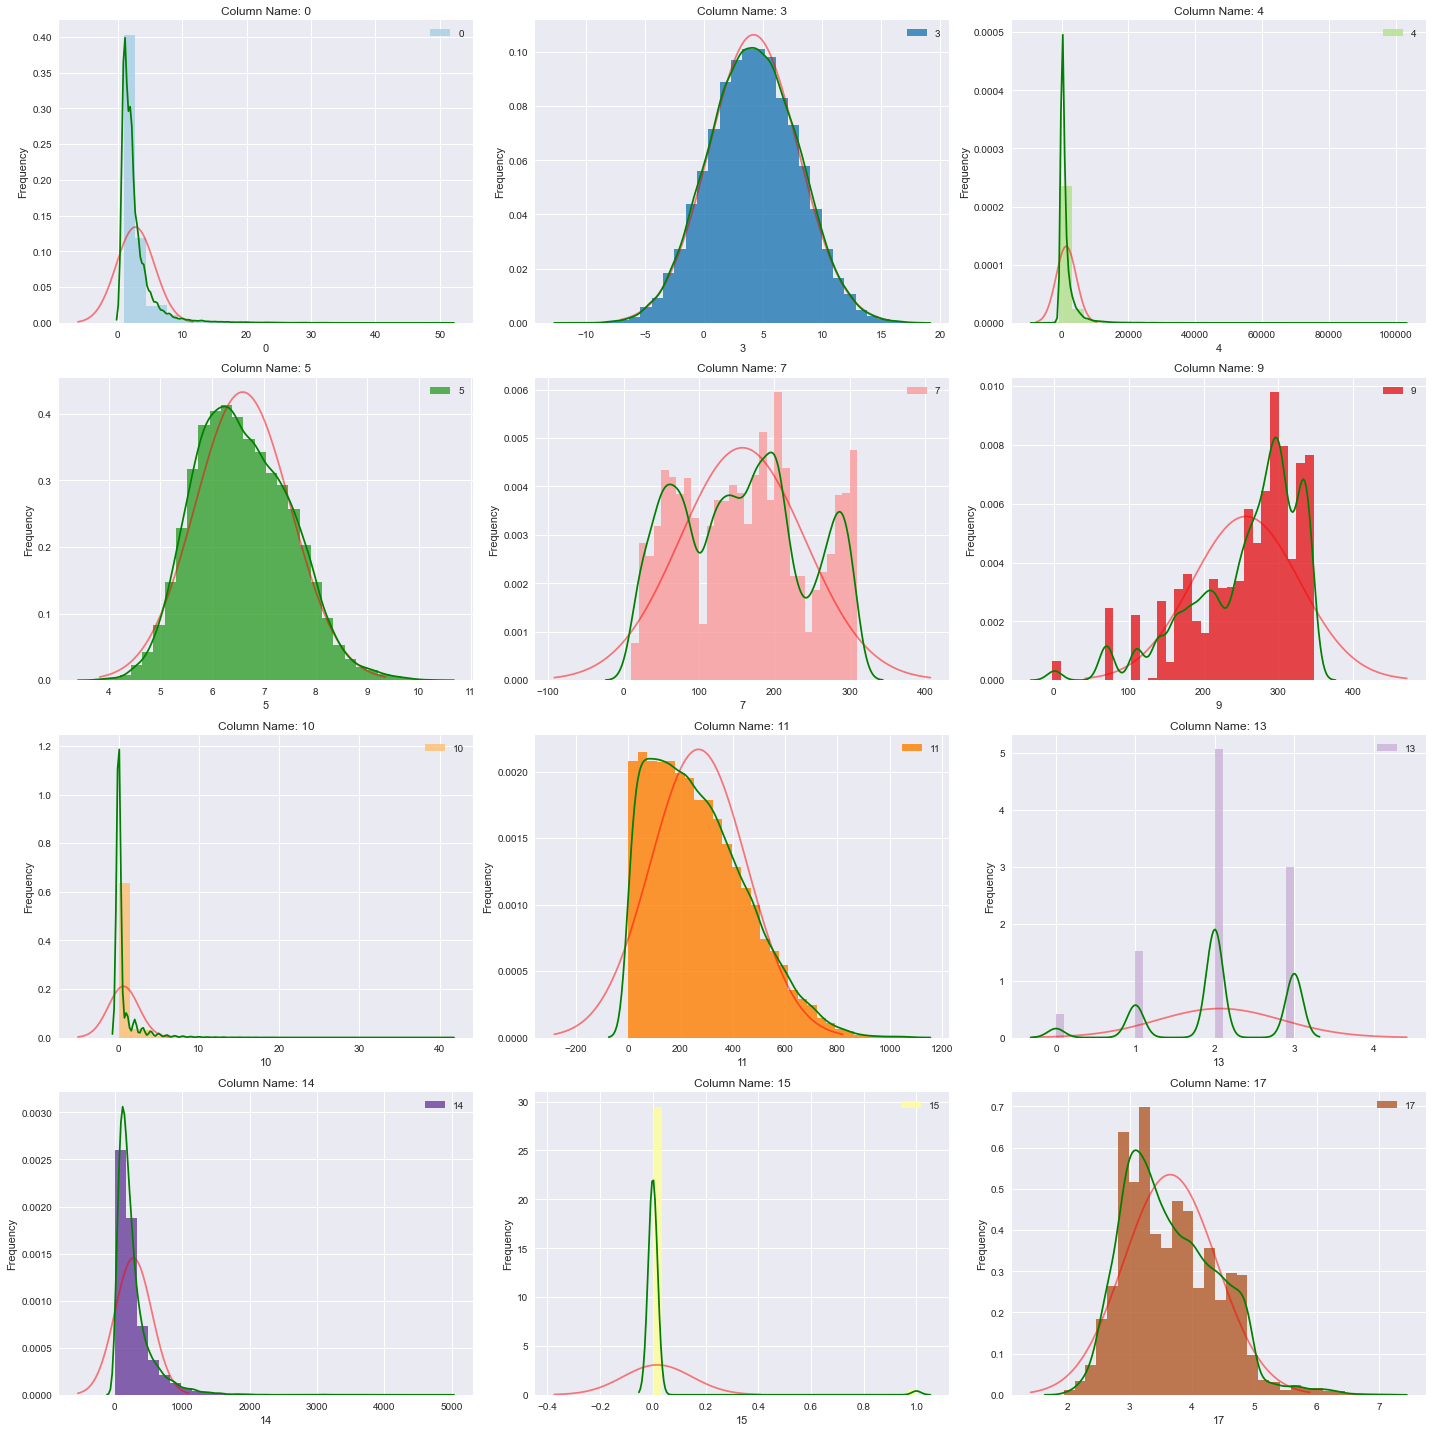

In [60]:
plt.style.use('seaborn')
for col, ind, color in zip(df_numeric_col.columns, range(len(df_numeric_col.columns))[1:],sns.color_palette("Paired")):
    plt.subplot(4, 3, ind)
    df_numeric_col[col].plot.hist(bins=30 , density=1, alpha=0.8, color=color,title='Column Name: '+ col, figsize=(20,20), legend=True)
    x = np.linspace(stats[stats['index'] == col]['mean'] - 3*stats[stats['index'] == col]['std'],
                    stats[stats['index'] == col]['mean'] + 3*stats[stats['index'] == col]['std'], 100)
    plt.plot(x, st.norm.pdf(x, stats[stats['index'] == col]['mean'], stats[stats['index'] == col]['std']), c='r', alpha=0.5)
    sns.kdeplot(df[col], c='g')
plt.tight_layout()

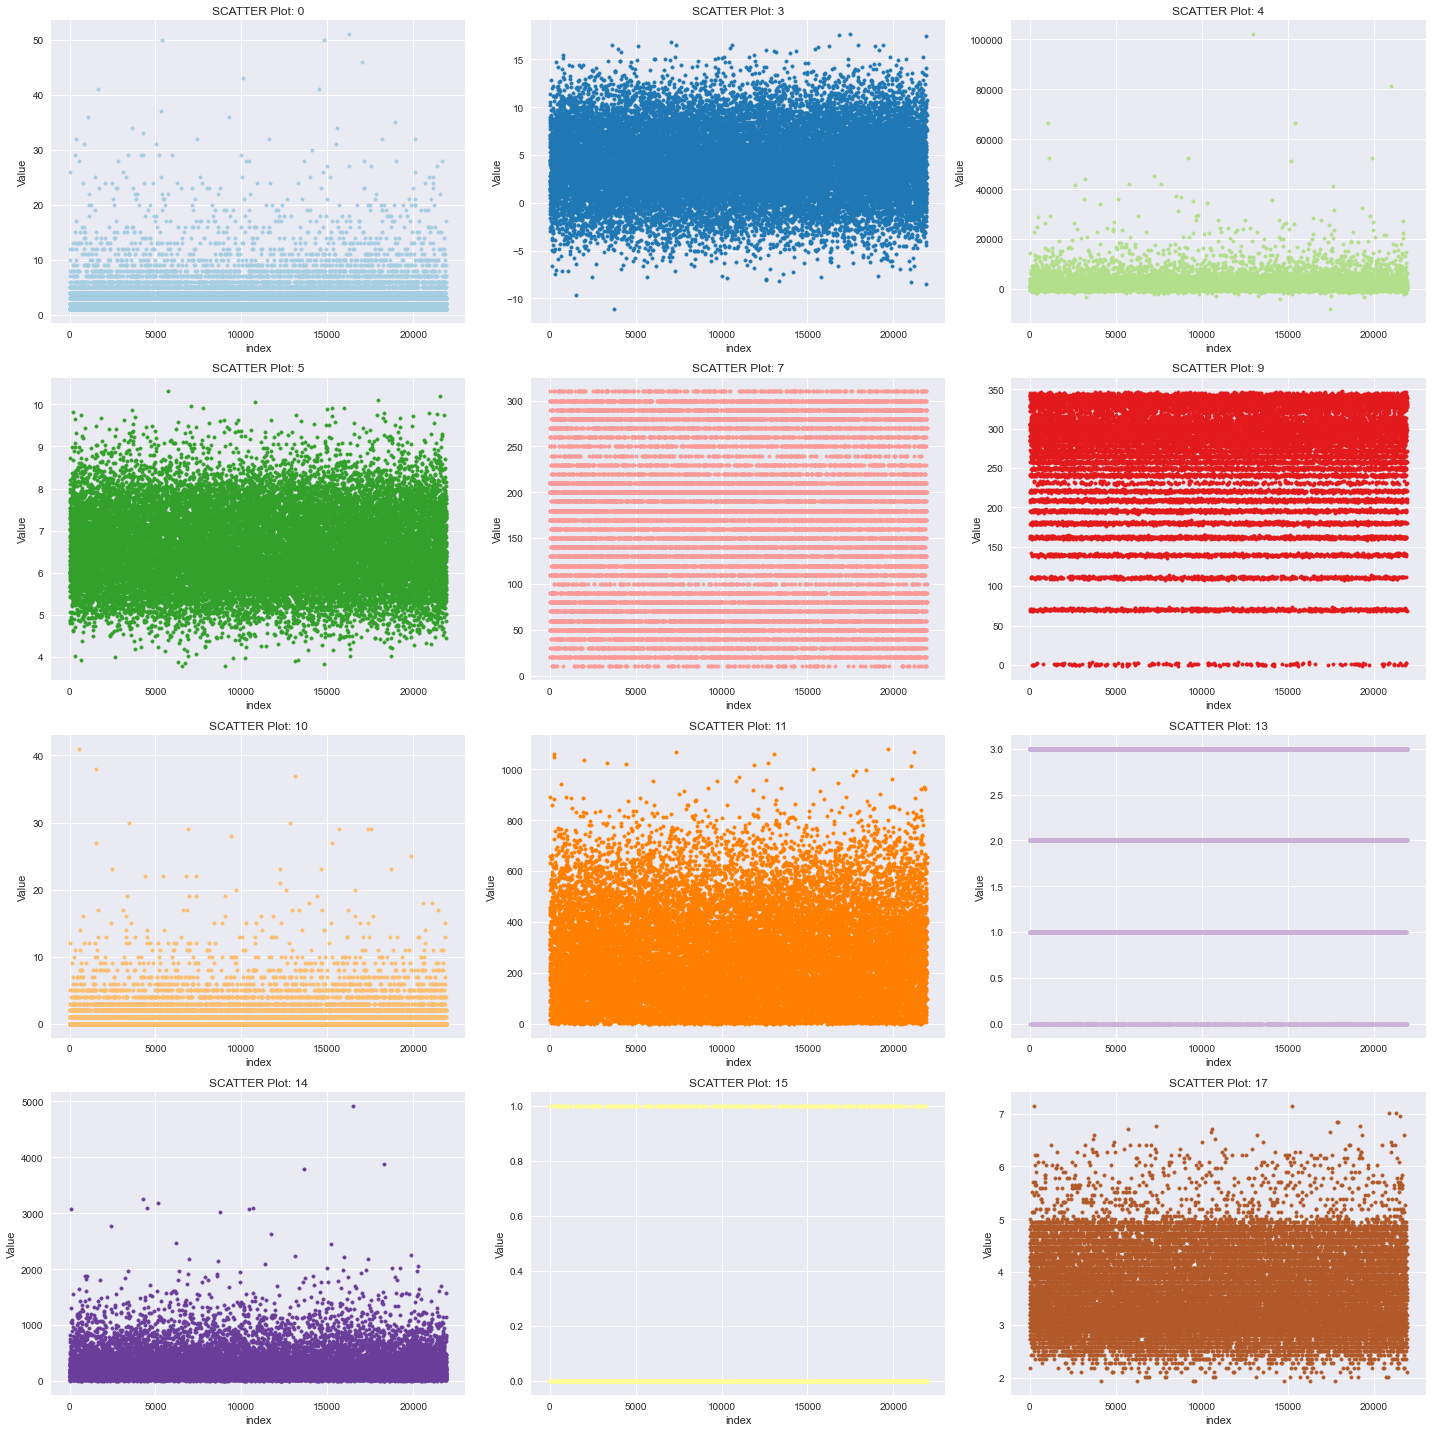

In [27]:
plt.style.use('seaborn')
plt.figure(figsize=(20,20))
for col, ind, color in zip(df_numeric_col.columns, range(len(df_numeric_col.columns))[1:],sns.color_palette("Paired")):
    plt.subplot(4, 3, ind)
    x = df_numeric_col[col].reset_index()
    plt.scatter(x['index'], x[col], marker = ".",color = color)
    plt.gca().update(dict(title='SCATTER Plot: ' +str(col) , xlabel='index', ylabel='Value'))
plt.tight_layout()

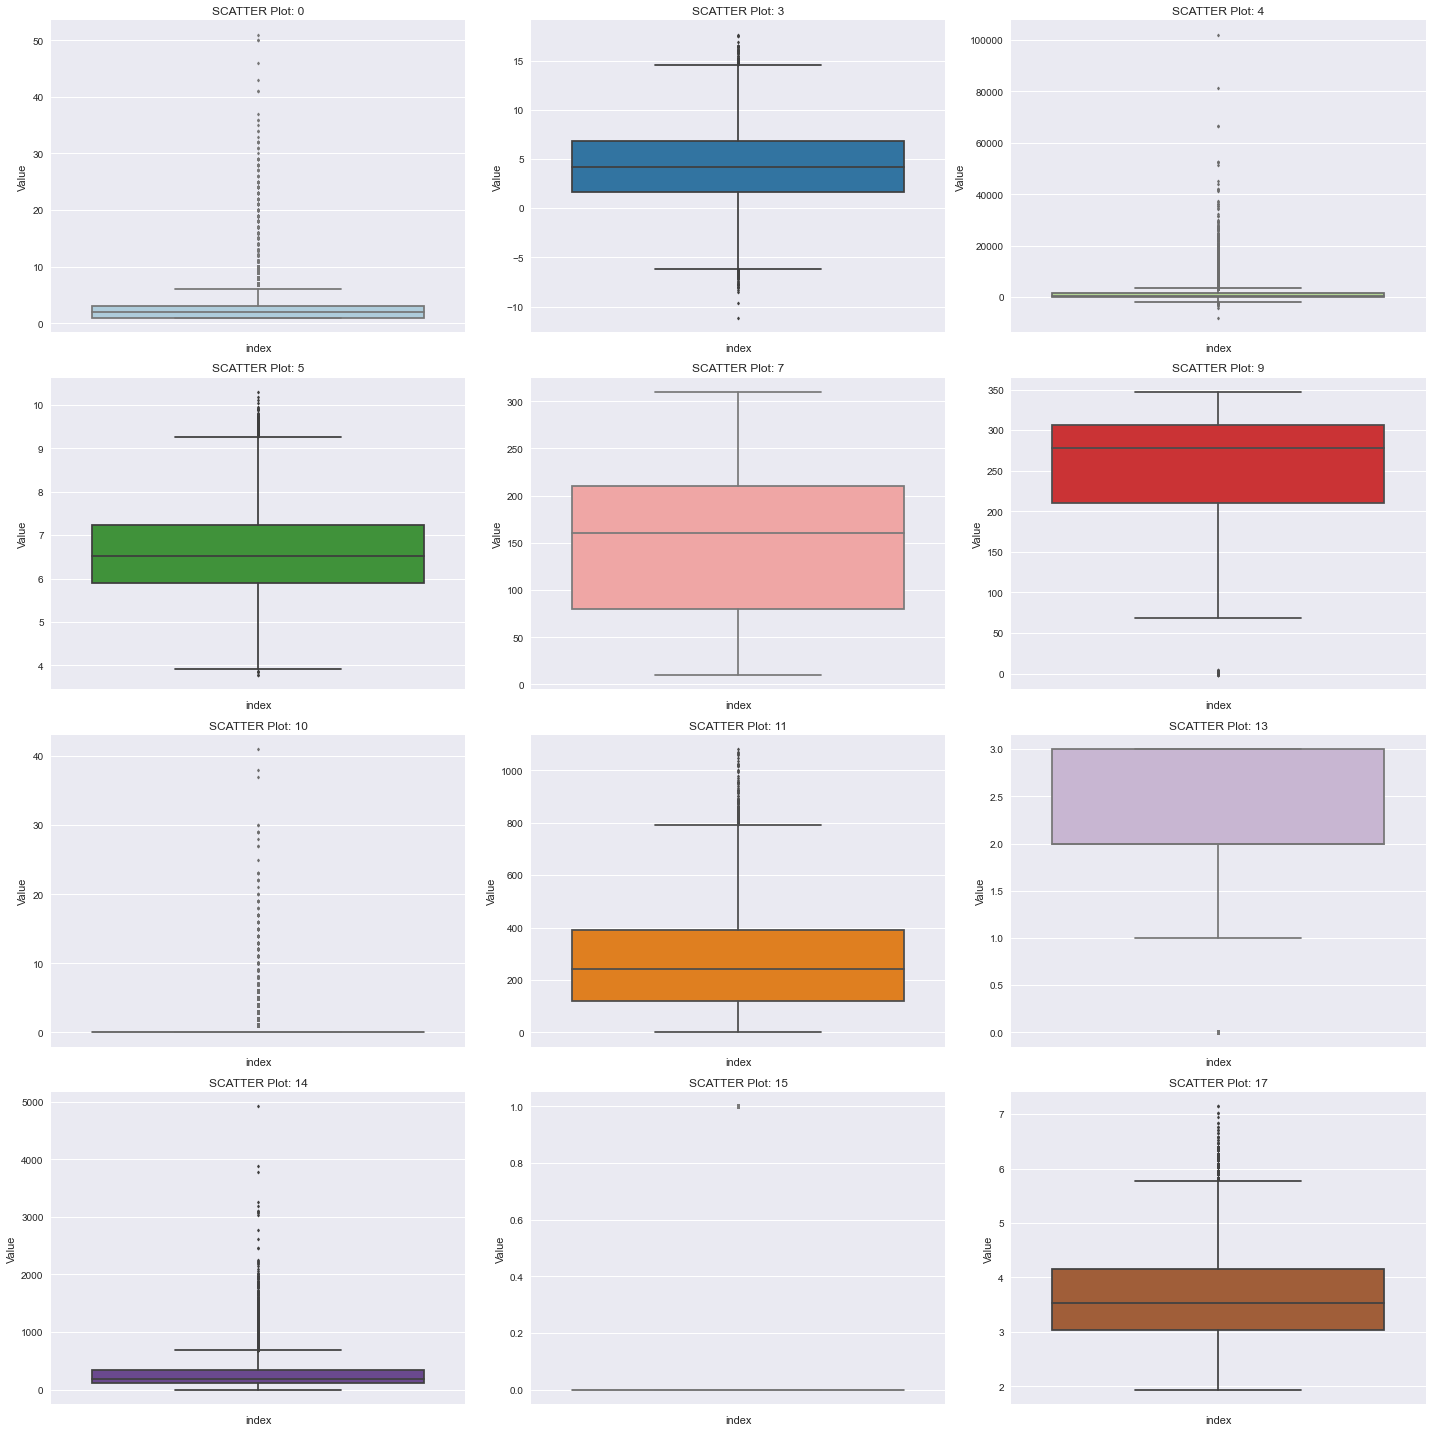

In [28]:
plt.figure(figsize=(20,20))
for col, ind, color in zip(df_numeric_col.columns, range(len(df_numeric_col.columns))[1:],sns.color_palette("Paired")):
    plt.subplot(4, 3, ind)
    sns.boxplot(y=df[col], color=color, fliersize=2)
    plt.gca().update(dict(title='SCATTER Plot: ' +str(col) , xlabel='index', ylabel='Value'))
plt.tight_layout()

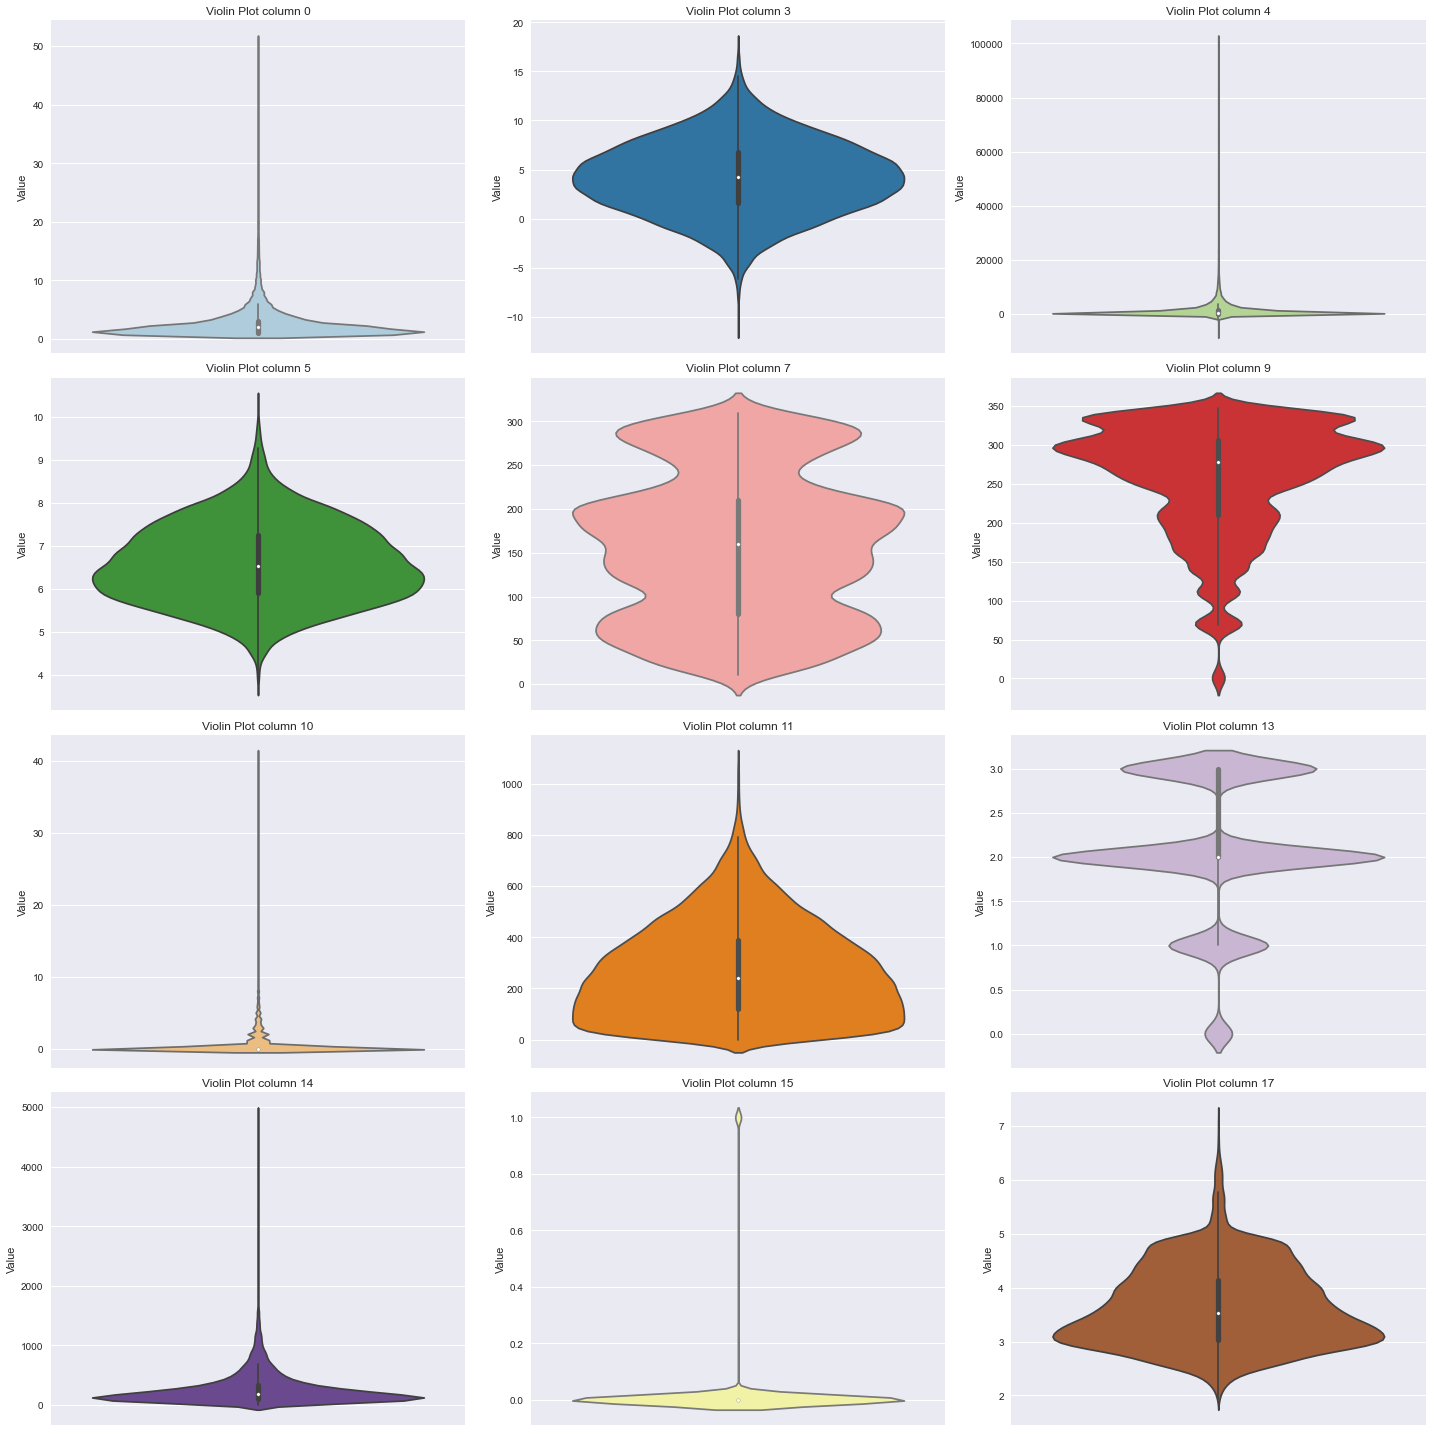

In [29]:
plt.figure(figsize=(20,20))
for col, ind, color in zip(df_numeric_col.columns, range(len(df_numeric_col.columns))[1:],sns.color_palette("Paired")):
    plt.subplot(4, 3, ind)
    sns.violinplot(y=df[col], color=color, inner='box')
    plt.gca().update(dict(title='Violin Plot column ' +str(col) ,ylabel='Value'))
plt.tight_layout()

### Using quantile:

In [43]:
HQ11 = df['11'].quantile(0.75)
LQ11 = df['11'].quantile(0.25)
high = (HQ11 - LQ11)*1.5 + HQ11
low = -(HQ11 - LQ11)*1.5 + LQ11
# df_filtered = df[(df["col"] < q_hi) & (df["col"] > q_low)]
low, high

(-284.9887659768958, 793.1613162968699)

In [59]:
df_numeric_col[st.zscore(df_numeric_col.dropna())  < 3]

ValueError: Item wrong length 17356 instead of 21931.

In [58]:
st.zscore(df_numeric_col.dropna())

array([[-0.56973067, -0.90223101, -0.38620799, ..., -0.13149486,
        -1.95081769, -0.51364887],
       [ 1.752544  ,  1.2674445 , -0.44255716, ..., -0.13149486,
         0.22099103,  1.06319608],
       [-0.56973067, -0.73477525,  0.63735822, ..., -0.13149486,
         0.85452849, -0.78265667],
       ...,
       [-0.56973067,  1.33475208, -0.3822304 , ..., -0.13149486,
        -0.8180958 , -0.1286608 ],
       [ 0.09377638, -0.74353978, -0.18301949, ..., -0.13149486,
        -2.06160942, -0.45593383],
       [-0.23797715, -0.05375258, -0.43891104, ..., -0.13149486,
        -1.41947806, -1.4094347 ]])

In [56]:
np.abs(st.zscore(df_numeric_col))

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

## Number of unique elements in every non float fetaure:

In [9]:
df[df.columns[df.dtypes != 'float64']].nunique()

1          3
2        491
6         11
8          2
12         2
16         3
18        12
label      2
dtype: int64

### Exploring each column seperatly:

#### Column '1':

In [10]:
df.groupby('1')['1'].count().sort_values(ascending=False)

1
a          14397
unknown     6009
b           1436
Name: 1, dtype: int64

In [352]:
a = pd.get_dummies(df['1'], prefix = "1")
df = pd.concat([df, a], axis = 1)
df.drop(columns=['1'], inplace=True)

,0,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,20,label,1_a,1_b,1_unknown
0,1.0,-1d,0.828866,216.0,4.846091,K,50.0,0,161.714226,0.0,...,414.0,0.0,S,2.191401,a8,15.921017,1,1,0,0
1,8.0,-1d,8.981168,46.0,7.324911,A,270.0,0,328.559851,0.0,...,63.0,0.0,M,3.811778,a8,47.567140,0,1,0,0
2,1.0,-1d,1.458061,3304.0,7.548887,D,200.0,1,298.775554,0.0,...,218.0,0.0,M,4.284457,a4,10.522228,0,1,0,0
3,1.0,-1d,2.753682,212.0,8.200746,E,170.0,0,285.342907,0.0,...,NaN,0.0,D,4.680751,a7,21.185050,0,0,1,0
4,1.0,-1d,4.496872,1050.0,5.071094,B,260.0,1,328.464688,0.0,...,293.0,0.0,S,2.740114,a5,47.491164,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21926,1.0,-1d,9.234068,228.0,6.497949,G,200.0,1,298.387445,0.0,...,257.0,0.0,S,3.036520,a5,23.647446,0,0,0,1
21927,3.0,202d,1.425130,829.0,4.459834,K,270.0,0,330.998210,2.0,...,196.0,0.0,S,2.108740,a1,17.079316,1,1,0,0
21928,1.0,-1d,7.656161,296.0,6.688392,A,80.0,1,210.458322,0.0,...,NaN,0.0,M,4.083415,a5,26.412485,0,1,0,0
21929,2.0,-1d,4.016924,57.0,5.486059,B,90.0,1,220.485053,0.0,...,404.0,0.0,S,2.587831,a5,-2.056748,0,0,0,1


In [353]:
df.groupby('2')['2'].count().sort_values(ascending=False)

2
-1d     17633
92d        98
182d       95
91d        76
181d       72
        ...  
515d        1
514d        1
511d        1
415d        1
449d        1
Name: 2, Length: 491, dtype: int64

#### Since column 2 contains strings which are basically numbers with the end of the letter 'd' (which we dont know what it represents) we will erase this letter and chage its type to 'float'. In places of NaN value we change to mode value -1:

In [354]:
df['2'] = [float(i[:-1]) if type(i)==str else -1. for i in df['2']]

In [355]:
df.groupby('6')['6'].count()

6
A    4592
B    3701
C     694
D    4612
E    1153
F    2563
G    1910
H     766
I     654
J     621
K     520
Name: 6, dtype: int64

In [315]:
df.groupby('8')['8'].count()

8
0    10035
1    11896
Name: 8, dtype: int64

In [316]:
df.groupby('12')['12'].count()

12
n    18496
y     3422
Name: 12, dtype: int64

In [318]:
df.groupby('15')['15'].count()

15
0.0    21454
1.0      378
Name: 15, dtype: int64

#### Since the mode value is 0 (by large amount of samples), we will fill NaN values as 0:

In [319]:
df['15'].fillna(0, inplace=True)

#### Column 8 is Binary

In [30]:
df_numeric_col[(np.abs(stats.zscore(df_numeric_col)) < 3).all(axis=1)]

AttributeError: 'DataFrame' object has no attribute 'zscore'

In [35]:
df2 = pd.DataFrame(np.random.randn(100, 3))

df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]


AttributeError: 'DataFrame' object has no attribute 'zscore'

In [13]:
# plt.style.use('seaborn')
# df['3'].plot.hist(bins=50, density=1, alpha=0.5, color='g')


In [99]:
corr = df.corr().iloc[:-1, :-1]

In [100]:
corr

,0,3,4,5,7,8,9,10,11,13,14,15,17,20
0,1.000000,0.090564,-0.016967,0.009964,0.148854,-0.016146,0.125903,-0.040795,0.067913,-0.004287,-0.088212,0.021060,0.013737,0.009342
3,0.090564,1.000000,0.008787,-0.005487,0.595225,-0.010804,0.559471,-0.036505,0.235581,0.020109,-0.006195,0.007360,-0.009694,-0.003220
4,-0.016967,0.008787,1.000000,0.079775,0.010736,-0.070730,0.012900,0.023810,-0.016112,0.066848,0.019207,-0.065642,0.089116,0.004001
5,0.009964,-0.005487,0.079775,1.000000,-0.011275,-0.158702,-0.009352,0.002224,-0.012126,-0.156433,-0.002931,-0.021401,0.900337,0.033696
7,0.148854,0.595225,0.010736,-0.011275,1.000000,-0.027526,0.934719,-0.057871,0.408754,0.020601,-0.015932,0.002894,-0.012857,-0.000478
8,-0.016146,-0.010804,-0.070730,-0.158702,-0.027526,1.000000,0.004297,0.033749,-0.017673,-0.047802,-0.001613,-0.001384,-0.183501,-0.011306
9,0.125903,0.559471,0.012900,-0.009352,0.934719,0.004297,1.000000,-0.049853,0.346862,0.007414,-0.007818,0.000099,-0.011786,-0.002989
10,-0.040795,-0.036505,0.023810,0.002224,-0.057871,0.033749,-0.049853,1.000000,-0.026031,0.035655,0.000129,-0.024436,0.002636,-0.005110
11,0.067913,0.235581,-0.016112,-0.012126,0.408754,-0.017673,0.346862,-0.026031,1.000000,0.007226,-0.012364,0.007591,-0.011609,-0.001808
13,-0.004287,0.020109,0.066848,-0.156433,0.020601,-0.047802,0.007414,0.035655,0.007226,1.000000,-0.002458,-0.015145,-0.173396,-0.003954


In [111]:
corr_max = corr.apply(lambda x: [x.iloc[lambda y: y.index != x.name].max(), x.iloc[lambda y: y.index != x.name].idxmax()])

In [112]:
corr_max

,0,3,4,5,7,8,9,10,11,13,14,15,17,20
0,0.148854,0.595225,0.089116,0.900337,0.934719,0.033749,0.934719,0.035655,0.408754,0.066848,0.019207,0.02106,0.900337,0.038005
1,7,7,17,17,9,10,7,13,7,4,4,0,5,17
